# Tejasvee Dwivedi- Brainwave Task 2

## Libraries

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Dataset

In [9]:
train= pd.read_csv("twitter_training.csv")
valid= pd.read_csv("twitter_validation.csv")

In [11]:
train.head(10)

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [13]:
valid.head(10)

,id,topic,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


## NLP application

In [16]:
# Download NLTK resources (Run this on your local system)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\tejas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\tejas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tejas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
# Load datasets
train_path = 'twitter_training.csv'
valid_path = 'twitter_validation.csv'

train_df = pd.read_csv(train_path, encoding='latin1')
valid_df = pd.read_csv(valid_path, encoding='latin1')

In [20]:
print(train_df.columns)

Index(['id', 'topic', 'sentiment', 'text'], dtype='object')


In [22]:
# Drop irrelevant columns (keep only sentiment and text)
train_df = train_df[['sentiment', 'text']].dropna()
valid_df = valid_df[['sentiment', 'text']].dropna()

In [24]:
# Function to clean the text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [26]:
# Apply the cleaning function
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
valid_df['cleaned_text'] = valid_df['text'].apply(clean_text)

In [27]:
# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [28]:
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatization
    return ' '.join(tokens)

train_df['processed_text'] = train_df['cleaned_text'].apply(preprocess_text)
valid_df['processed_text'] = valid_df['cleaned_text'].apply(preprocess_text)

# Encode sentiment labels (convert them to numbers)
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3}
train_df['sentiment_encoded'] = train_df['sentiment'].map(sentiment_mapping)
valid_df['sentiment_encoded'] = valid_df['sentiment'].map(sentiment_mapping)

In [30]:
# Split the training data for model training
X = train_df['processed_text']
y = train_df['sentiment_encoded']

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [32]:
# Predict and evaluate on test set
y_pred = classifier.predict(X_test)

# Classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred, target_names=sentiment_mapping.keys())
conf_matrix = confusion_matrix(y_test, y_pred)

## Graphs

C:\Users\tejas\AppData\Local\Temp\ipykernel_24540\2921516468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['sentiment'], order=train_df['sentiment'].value_counts().index, palette='viridis')


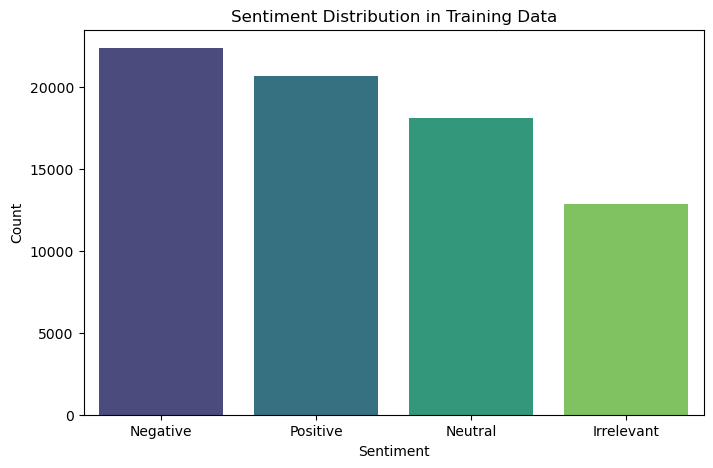

In [34]:
# Visualize the sentiment distribution in the training data
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['sentiment'], order=train_df['sentiment'].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

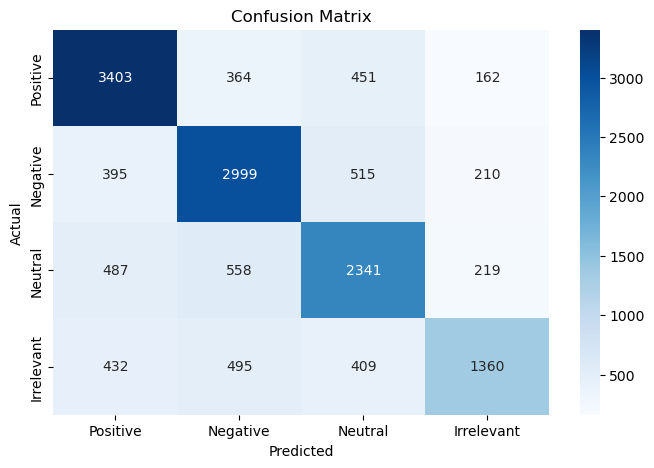

In [35]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Predict on the validation set
X_valid_tfidf = tfidf_vectorizer.transform(valid_df['processed_text'])
valid_predictions = classifier.predict(X_valid_tfidf)

# Add predictions to the validation DataFrame
valid_df['predicted_sentiment'] = valid_predictions
valid_df['predicted_sentiment_label'] = valid_df['predicted_sentiment'].map({v: k for k, v in sentiment_mapping.items()})

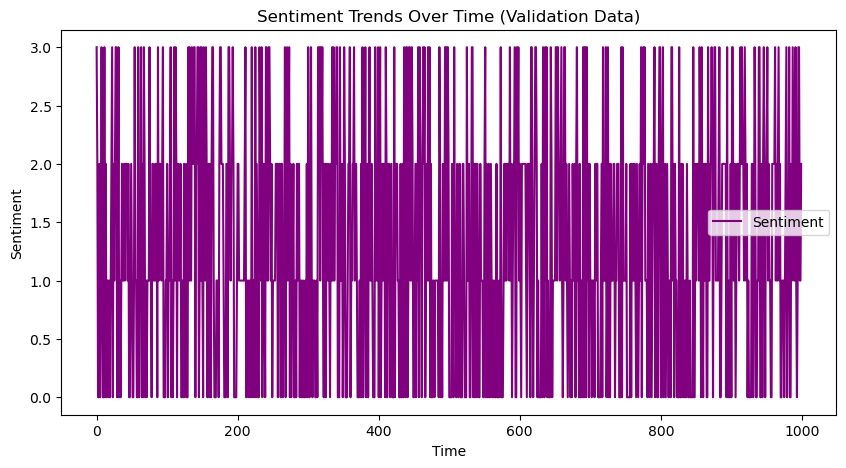

In [37]:
# Sentiment trends over time (assuming "id" represents time order)
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(valid_df)), y=valid_df['predicted_sentiment'], label='Sentiment', color='purple')
plt.title('Sentiment Trends Over Time (Validation Data)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

In [38]:
# Final output
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

    Positive       0.72      0.78      0.75      4380
    Negative       0.68      0.73      0.70      4119
     Neutral       0.63      0.65      0.64      3605
  Irrelevant       0.70      0.50      0.59      2696

    accuracy                           0.68     14800
   macro avg       0.68      0.66      0.67     14800
weighted avg       0.68      0.68      0.68     14800

Confusion Matrix:
[[3403  364  451  162]
 [ 395 2999  515  210]
 [ 487  558 2341  219]
 [ 432  495  409 1360]]


In [39]:
# Save the processed DataFrames for future analysis
train_df.to_csv('processed_training_data.csv', index=False)
valid_df.to_csv('processed_validation_data.csv', index=False)

## Local Input/Output

In [41]:
# Take user input and predict sentiment
def predict_sentiment(user_input):
    # Clean and preprocess input
    cleaned_input = clean_text(user_input)
    processed_input = preprocess_text(cleaned_input)
    
    # Convert input to TF-IDF vector
    input_tfidf = tfidf_vectorizer.transform([processed_input])
    
    # Predict sentiment
    prediction = classifier.predict(input_tfidf)
    sentiment_label = {v: k for k, v in sentiment_mapping.items()}  # Reverse the mapping
    return sentiment_label[prediction[0]]

# Loop for continuous input
while True:
    user_input = input("Enter a tweet or text to analyze its sentiment (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_input)
    print(f"The predicted sentiment is: {sentiment}")


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  I absolutely love the new design of this app! It's so user-friendly and fast. 


The predicted sentiment is: Positive


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  Great service and timely delivery. Keep up the good work!


The predicted sentiment is: Positive


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  Good mouse, I killed with it.


The predicted sentiment is: Irrelevant


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  This movie made my day! So uplifting and inspiring.


The predicted sentiment is: Neutral


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  Terrible customer service! I've been waiting for hours with no response. 


The predicted sentiment is: Negative


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  The update ruined the app. It's full of bugs and crashes all the time.


The predicted sentiment is: Negative


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  The meeting has been rescheduled to tomorrow at 3 PM.


The predicted sentiment is: Neutral


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  Received my order today. Packaging was standard, and delivery was on time.


The predicted sentiment is: Negative


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  The food was great, but the service was too slow. Not sure if I'll visit again


The predicted sentiment is: Neutral


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  The app is feature-rich, but it's also quite buggy. Needs improvement.


The predicted sentiment is: Neutral


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  What an amazing product! Totally worth the price. Highly recommend!


The predicted sentiment is: Positive


Enter a tweet or text to analyze its sentiment (or type 'exit' to quit):  exit


In [52]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

with open('sentiment_classifier.pkl', 'wb') as clf_file:
    pickle.dump(classifier, clf_file)

## GUI for a better user experience

In [55]:
import tkinter as tk
from tkinter import messagebox
import pickle

with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    tfidf_vectorizer = pickle.load(vec_file)

with open('sentiment_classifier.pkl', 'rb') as clf_file:
    classifier = pickle.load(clf_file)

# GUI application
def analyze_sentiment():
    user_input = input_text.get("1.0", tk.END).strip()
    if not user_input:
        messagebox.showwarning("Warning", "Please enter some text.")
        return

    sentiment = predict_sentiment(user_input)
    result_label.config(text=f"Predicted Sentiment: {sentiment}", fg="blue")

def clear_fields():
    input_text.delete("1.0", tk.END)
    result_label.config(text="")

# Main window
root = tk.Tk()
root.title("Sentiment Analysis")

# Input field
tk.Label(root, text="Enter text for sentiment analysis:").pack(pady=5)
input_text = tk.Text(root, height=5, width=50)
input_text.pack(pady=5)

# Button frame
button_frame = tk.Frame(root)
button_frame.pack(pady=10)

# Analyze button
analyze_button = tk.Button(button_frame, text="Analyze Sentiment", command=analyze_sentiment)
analyze_button.grid(row=0, column=0, padx=5)

# Clear button
clear_button = tk.Button(button_frame, text="Clear", command=clear_fields)
clear_button.grid(row=0, column=1, padx=5)

# Result label
result_label = tk.Label(root, text="", font=("Helvetica", 12))
result_label.pack(pady=10)

# Run the application
root.mainloop()